### Importing Libraries and loading dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set()
import numpy as np
import statsmodels.api as sm
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
ecommerce = pd.read_excel('/content/Sample_Longlist_Data.xlsx')
ecommerce.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


In [3]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1839 non-null   datetime64[ns]
 1   category                                           1839 non-null   object        
 2   sellerlink                                         1839 non-null   object        
 3   sellerlink-url                                     1839 non-null   object        
 4   sellerstorefront-url                               1839 non-null   object        
 5   sellerproductcount                                 1513 non-null   object        
 6   sellerratings                                      1411 non-null   object        
 7   sellerdetails                                      1812 non-null   object        
 8   seller business na

### Data Cleaning
1. Dropping Null elements
2. Indexing
3. Extracting the sellercount
4. Extracting the positive rate %
5. Extracting the ratecount
6. Extracting contact information
7. Removing China(CN) 

#### Dropping Null elements

In [4]:
ecommerce.isna().sum()

Date Added                                             0
category                                               0
sellerlink                                             0
sellerlink-url                                         0
sellerstorefront-url                                   0
sellerproductcount                                   326
sellerratings                                        428
sellerdetails                                         27
seller business name                                  56
businessaddress                                       75
Count of seller brands                                 0
Max % of negative seller ratings - last 30 days        0
Max % of negative seller ratings - last 90 days        0
Max % of negative seller ratings - last 12 months      0
Hero Product 1 #ratings                                0
Hero Product 2 #ratings                                0
Sample brand name                                      4
Sample Brand URL               

In [5]:
ecommerce.dropna(inplace=True)

In [6]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 0 to 1838
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1159 non-null   datetime64[ns]
 1   category                                           1159 non-null   object        
 2   sellerlink                                         1159 non-null   object        
 3   sellerlink-url                                     1159 non-null   object        
 4   sellerstorefront-url                               1159 non-null   object        
 5   sellerproductcount                                 1159 non-null   object        
 6   sellerratings                                      1159 non-null   object        
 7   sellerdetails                                      1159 non-null   object        
 8   seller business na

#### Indexing

In [7]:
# Unique value 
#ecommerce['sellerlink'].is_unique
#ecommerce = ecommerce.set_index('sellerlink')
#ecommerce.head()

#### Sellercount

In [8]:
#Extracting the count 
ecommerce['sellerproductcount'] = ecommerce['sellerproductcount'].str.split(" ").str[-2]

#### Sellerrating

In [9]:
#Extracting the positive % of rating in last 12 months
ecommerce['Positive %'] = ecommerce['sellerratings'].str.split("%").str[0]

#extracting the number of ratings
ecommerce['sellerratings'] = ecommerce['sellerratings'].str.extract('\((\d+(?:-\d+)?)', expand=False)

#### Contact details of seller

In [10]:
#Extracting phone number and email of the seller 

ecommerce['Phone_seller'] = ecommerce['sellerdetails'].str.extract(r'([\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9])')
ecommerce['E-mail_seller'] = ecommerce['sellerdetails'].str.extract(r'([a-zA-Z][a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]+)')


#### business address

In [11]:
#Removing China(CN)

ecommerce['Country'] = ecommerce['businessaddress'].str[-2:]
ecommerce = ecommerce[ecommerce['Country'] != 'CN']

ecommerce.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,Positive %,Phone_seller,E-mail_seller,Country
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"100,000",118,Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88,10022-6630,jadgemaello@gmail.com,US
14,2020-11-15,Garden,Seller 15,Seller 15-link,Seller 15-storefrontlink,919,116,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,...,0,3,1446,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,97,15140008562,webmaster@9pm-store.de,DE
22,2020-11-15,Garden,Seller 23,Seller 23-link,Seller 23-storefrontlink,"40,000",10,Bestof Floral is committed to providing each c...,Business Name:MADEWELL SUPPLY INC,90 BROAD ST 2ND FLOORNEW YORKNY10004-2205US,...,0,0,10538,8293,Visit the Seville Classics Store,https://www.amazon.de/-/en/stores/Seville+Clas...,100,NaN,NaN,US
23,2020-11-15,Garden,Seller 24,Seller 24-link,Seller 24-storefrontlink,"100,000",3134,Blumenbecker Industriebedarf GmbH Sudhoferweg ...,Business Name:Blumenbecker Industriebedarf GmbH,Sudhoferweg 99-107BeckumNRW59269DE,...,12,10,30139,11182,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,88,99-107 59269,bib.beckum@blumenbecker.com,DE
24,2020-11-15,Garden,Seller 25,Seller 25-link,Seller 25-storefrontlink,"3,000",610,Herzlich willkommen auf unserer Internetpräsen...,Business Name:Jörg Müller & Petra Scheerer GbR,Miranderstr.21Korntal-Münchingen70825DE,...,1,2,3286,3079,Neudorff,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,97,NaN,NaN,DE


In [12]:
ecommerce.rename(columns = {'Count of seller brands':'sellerbrandcount', 'Max % of negative seller ratings - last 30 days':'MaxNegsellerRate30_%',
                              'Max % of negative seller ratings - last 90 days':'MaxNegsellerRate90_%','Max % of negative seller ratings - last 12 months':'MaxNegsellerRate12mnth_%',
                              'Hero Product 1 #ratings':'HP1','Hero Product 2 #ratings': 'HP2','Positive %': 'Pos_%'}, inplace = True)

In [13]:
list(ecommerce.columns)

['Date Added',
 'category',
 'sellerlink',
 'sellerlink-url',
 'sellerstorefront-url',
 'sellerproductcount',
 'sellerratings',
 'sellerdetails',
 'seller business name',
 'businessaddress',
 'sellerbrandcount',
 'MaxNegsellerRate30_%',
 'MaxNegsellerRate90_%',
 'MaxNegsellerRate12mnth_%',
 'HP1',
 'HP2',
 'Sample brand name',
 'Sample Brand URL',
 'Pos_%',
 'Phone_seller',
 'E-mail_seller',
 'Country']

In [14]:
ecommerce['sellerproductcount']= ecommerce['sellerproductcount'].str.replace(',', '')
ecommerce[['sellerproductcount','sellerratings','Pos_%']] = ecommerce[['sellerproductcount','sellerratings','Pos_%']].astype(str).astype(int)


### Analysis

##### Bar Plots

In [15]:
print(ecommerce['sellerratings'])

0        118
14       116
22        10
23      3134
24       610
        ... 
1784    2630
1785       3
1808      16
1814    3075
1815       4
Name: sellerratings, Length: 432, dtype: int64


In [16]:
n_ecom = ecommerce.copy()

In [17]:
#index_names = n_ecom[(n_ecom['MaxNegsellerRate30_%'] >= 20) & (n_ecom['MaxNegsellerRate90_%'] >= 20) & (n_ecom['MaxNegsellerRate12mnth_%'] >= 20)
#                      & (n_ecom['Pos_%'] <= 80) & (n_ecom['sellerbrandcount'] <= 10) & (n_ecom['HP1'] <= 10000) & (n_ecom['HP2'] <= 10000) ].index
#n_ecom.drop(index_names, inplace = True)

In [18]:
index_names = n_ecom[(n_ecom['MaxNegsellerRate30_%'] >= 20)].index
n_ecom.drop(index_names, inplace = True)
index_names1 = n_ecom[(n_ecom['MaxNegsellerRate90_%'] >= 20)].index
n_ecom.drop(index_names1, inplace = True)
index_names2 = n_ecom[(n_ecom['MaxNegsellerRate12mnth_%'] >= 20)].index
n_ecom.drop(index_names2, inplace = True)
index_names3 = n_ecom[(n_ecom['Pos_%'] <= 80)].index
n_ecom.drop(index_names3, inplace = True)
index_names4 = n_ecom[(n_ecom['sellerbrandcount'] <= 10)].index
n_ecom.drop(index_names4, inplace = True)
index_names5 = n_ecom[(n_ecom['HP1'] <= 10000)].index
n_ecom.drop(index_names5, inplace = True)
index_names6 = n_ecom[(n_ecom['HP2'] <= 10000)].index
n_ecom.drop(index_names6, inplace = True)

Set a threshold value for different columns : 

* For Max % of negative reviews in 30days, 90 days and 12 months, all the values less 20% is accepted
* lly for postive % of reviews, more than 80% is selected
* brand count more than 10
* Hero product 1 and 2 should have atleast 10000 reviews

On the basis of this the different bar plots are plotted


In [19]:
n_ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 23 to 1815
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date Added                24 non-null     datetime64[ns]
 1   category                  24 non-null     object        
 2   sellerlink                24 non-null     object        
 3   sellerlink-url            24 non-null     object        
 4   sellerstorefront-url      24 non-null     object        
 5   sellerproductcount        24 non-null     int64         
 6   sellerratings             24 non-null     int64         
 7   sellerdetails             24 non-null     object        
 8   seller business name      24 non-null     object        
 9   businessaddress           24 non-null     object        
 10  sellerbrandcount          24 non-null     int64         
 11  MaxNegsellerRate30_%      24 non-null     int64         
 12  MaxNegsellerRate90_% 

Based on filtering process top 24 products are found.

In [20]:
n_ecom.head(10)

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,MaxNegsellerRate90_%,MaxNegsellerRate12mnth_%,HP1,HP2,Sample brand name,Sample Brand URL,Pos_%,Phone_seller,E-mail_seller,Country
23,2020-11-15,Garden,Seller 24,Seller 24-link,Seller 24-storefrontlink,100000,3134,Blumenbecker Industriebedarf GmbH Sudhoferweg ...,Business Name:Blumenbecker Industriebedarf GmbH,Sudhoferweg 99-107BeckumNRW59269DE,...,12,10,30139,11182,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,88,99-107 59269,bib.beckum@blumenbecker.com,DE
36,2020-11-15,Garden,Seller 37,Seller 37-link,Seller 37-storefrontlink,50000,5150,IMPRESSUM \n itenga GmbH\n Am Umspannwerk 2\n ...,Business Name:itenga GmbH,itenga GmbHAm Umspannwerk 2Illingen66557DE,...,8,8,40683,18910,Visit the Vileda Store,https://www.amazon.de/-/en/stores/Vileda+GmbH+...,91,NaN,info@itenga.de,DE
37,2020-11-15,Garden,Seller 38,Seller 38-link,Seller 38-storefrontlink,10000,120,IMPRESSUM Johannes Zierleyn KG\n Am Schweine...,Business Name:Johannes Zierleyn KG,Johannes Zierleyn KGAm Schweinemarkt 3Nordhorn...,...,11,4,40684,13311,Visit the TFA Dostmann Store,https://www.amazon.de/-/en/stores/TFA+Dostmann...,93,+49 5921 834011,nils.holm@zierleyn.de,DE
53,2020-11-15,Garden,Seller 54,Seller 54-link,Seller 54-storefrontlink,8000,4189,Impressum der Kaleido.Shop GmbH\nKaleido.Shop ...,Business Name:Kaleido.Shop GmbH,Neubrückenstr.7cBürenNordrhein-Westfalen33142DE,...,5,4,40684,10339,Visit the TFA Dostmann Store,https://www.amazon.de/-/en/stores/TFA+Dostmann...,95,NaN,info@kaleidoshop.de,DE
100,2020-11-15,Garden,Seller 101,Seller 101-link,Seller 101-storefrontlink,7000,3416,Kessler electronic GmbH\n Dieselstrasse 4\n 50...,Business Name:Kessler electronic GmbH,Dieselstr.4Kerpen50170DE,...,3,2,47337,32420,Visit the Varta Store,https://www.amazon.de/-/en/stores/VARTA+/page/...,97,49 (0)2273,info@kessler-electronic.de,DE
111,2020-11-15,Garden,Seller 112,Seller 112-link,Seller 112-storefrontlink,10000,168,Kinderwelt Hitzler\n Inh. Hans Hitzler e.K.\n ...,"Business Name:Kinderwelt Hitzler, Inh. Hans Hi...",Inh. Hans Hitzler e.K.Marktler Str. 25Burghaus...,...,10,10,13311,13011,Spielstabil,https://www.amazon.de/-/en/Spielstabil/b/ref=b...,89,NaN,info@kiddy-hits.de,DE
206,2020-11-15,Garden,Seller 207,Seller 207-link,Seller 207-storefrontlink,7000,1,Kubustotaal ist ein Komplettanbieter von Bürom...,Business Name:Kubustotaal vof,Theemsweg 99SpijkenisseNederland3201LTNL,...,0,0,66776,20759,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,100,NaN,NaN,NL
264,2020-11-15,Garden,Seller 265,Seller 265-link,Seller 265-storefrontlink,3000,124,Impressum: Leder MilzInh. Irene Koser e.K.Lind...,"Business Name:Michael Milz, Inhaber Irene Koser",Leder Milz Inh. Irene KoserLindenstr. 8Ludwigs...,...,0,2,15082,12487,Reisenthel,https://www.amazon.de/-/en/Reisenthel/b/ref=bl...,98,NaN,Info@LederMilz.deRegistergericht,DE
274,2020-11-15,Garden,Seller 275,Seller 275-link,Seller 275-storefrontlink,1000,15,Leonetti Giocattoli is committed to providing ...,Business Name:Leonetti Giocattoli di Maurizio ...,"Via Toledo, 350/351NapoliNA80134IT",...,0,13,22603,12676,Pavillo,https://www.amazon.de/-/en/Pavillo/b/ref=bl_dp...,87,NaN,NaN,IT
321,2020-11-15,Garden,Seller 322,Seller 322-link,Seller 322-storefrontlink,7000,196,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Business Name:VARIA System GmbH,Dr.-Salvador-Allende-Str.191ChemnitzSachsen091...,...,5,6,60384,57769,Visit the Umbra Store,https://www.amazon.de/-/en/stores/Umbra/page/4...,94,371 400 7682,shop@varia-store.com,DE


Text(0.5, 1.0, 'Seller vs Hero Product 1')

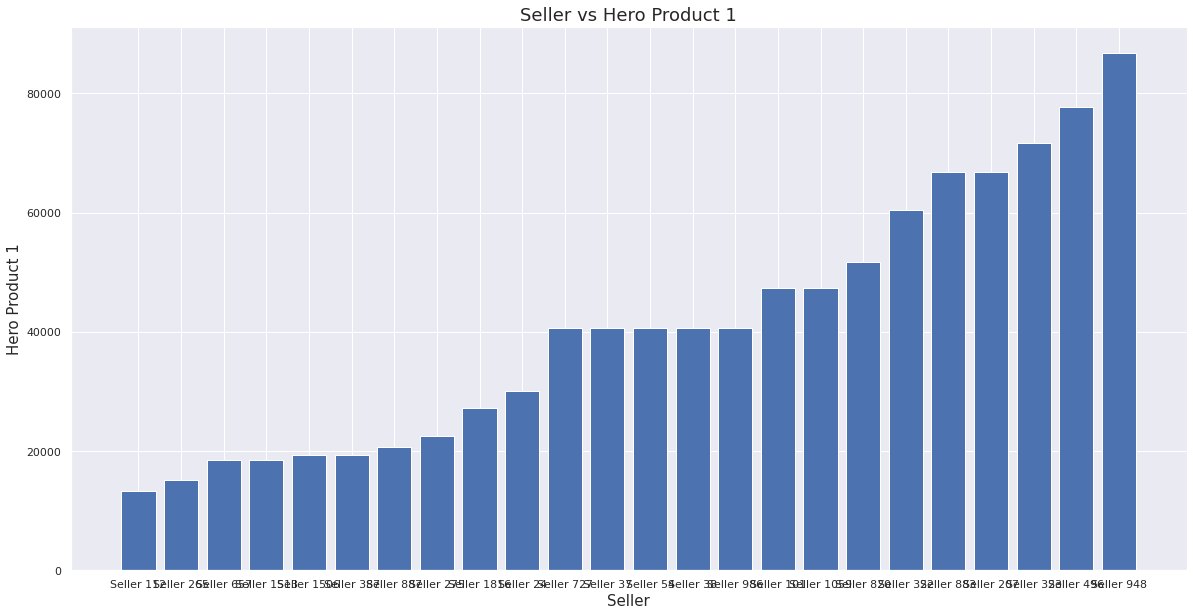

In [21]:
plt.figure(figsize=(20,10))
# make bar plot with matplotlib
n_ecom.sort_values(by=['HP1'], inplace= True)
plt.bar('sellerlink', 'HP1',data=n_ecom)
plt.xlabel("Seller", size=15)
plt.ylabel("Hero Product 1", size=15)
plt.title("Seller vs Hero Product 1", size=18)

Text(0.5, 1.0, 'Seller vs Hero Product 2')

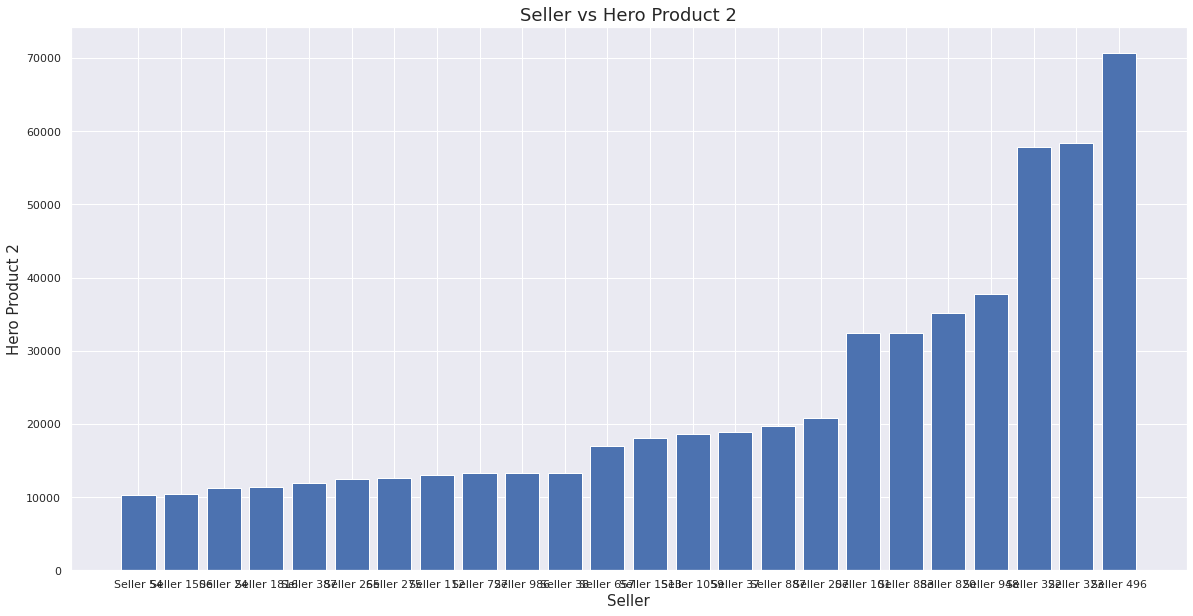

In [22]:
plt.figure(figsize=(20,10))
# make bar plot with matplotlib
n_ecom.sort_values(by=['HP2'], inplace= True)
plt.bar('sellerlink', 'HP2',data=n_ecom)
plt.xlabel("Seller", size=15)
plt.ylabel("Hero Product 2", size=15)
plt.title("Seller vs Hero Product 2", size=18)
#plt.savefig("bar_plot_matplotlib_Python.png")

Text(0.5, 1.0, 'Seller vs Product Count')

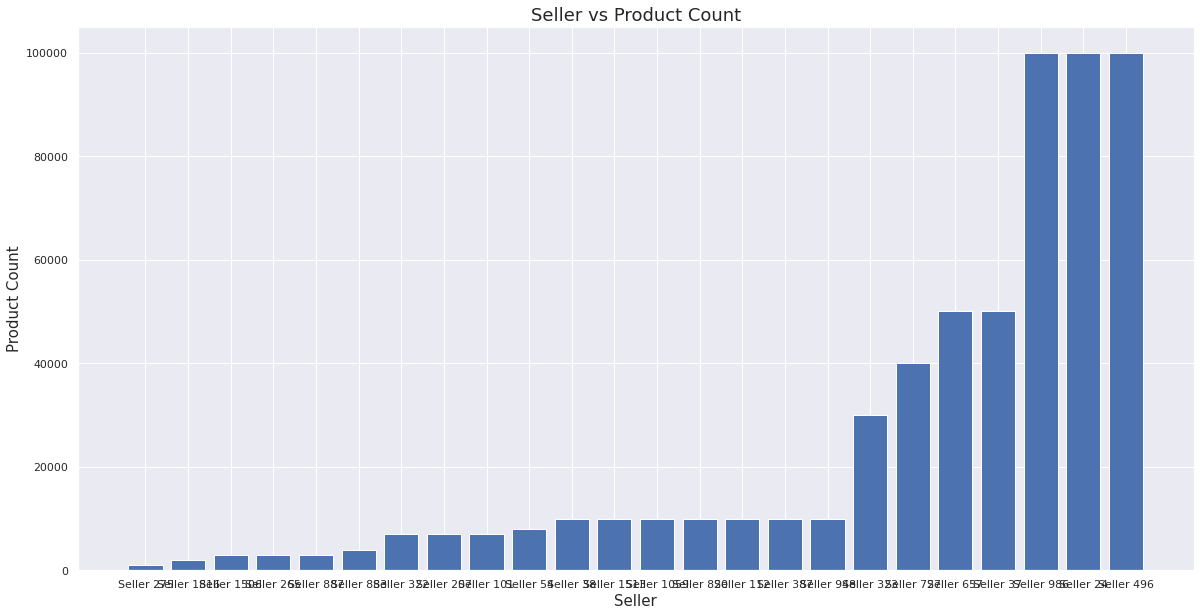

In [23]:
plt.figure(figsize=(20,10))
n_ecom.sort_values(by=['sellerproductcount'], inplace= True)
plt.bar('sellerlink', 'sellerproductcount',data=n_ecom)
plt.xlabel("Seller", size=15)
plt.ylabel("Product Count", size=15)
plt.title("Seller vs Product Count", size=18)
#plt.savefig("bar_plot_matplotlib_Python.png")

Text(0.5, 1.0, 'Seller vs Brand Count')

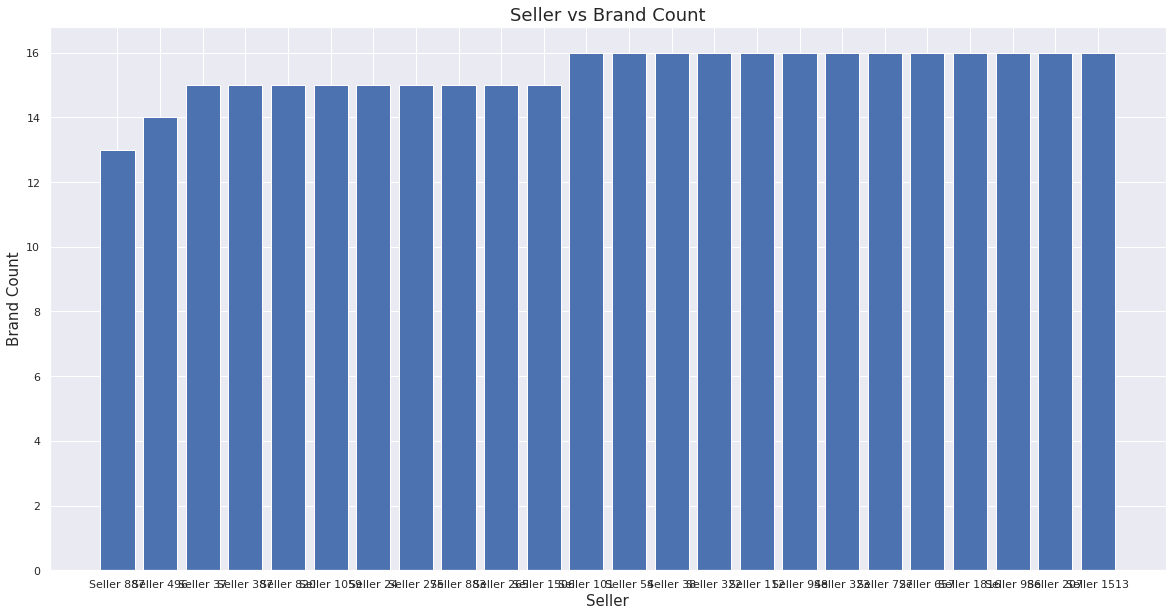

In [24]:
plt.figure(figsize=(20,10))
# make bar plot with matplotlib
n_ecom.sort_values(by=['sellerbrandcount'], inplace= True)
plt.bar('sellerlink', 'sellerbrandcount',data=n_ecom)
plt.xlabel("Seller", size=15)
plt.ylabel("Brand Count", size=15)
plt.title("Seller vs Brand Count", size=18)

Text(0.5, 1.0, 'Seller vs Max % Negative')

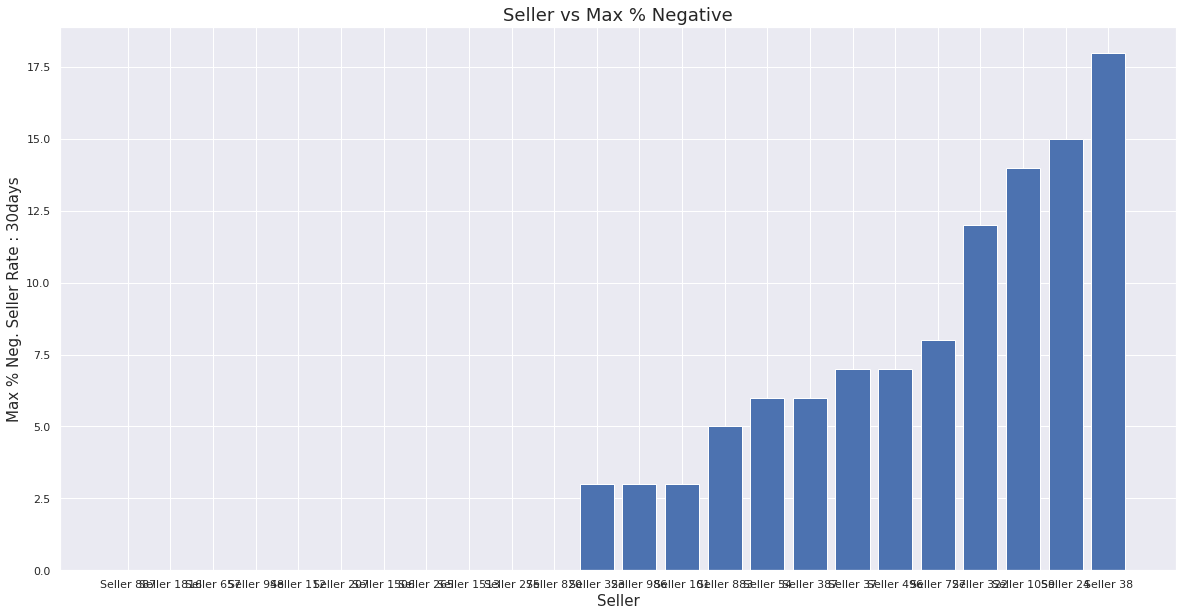

In [25]:
plt.figure(figsize=(20,10))
# make bar plot with matplotlib
n_ecom.sort_values(by=['MaxNegsellerRate30_%'], inplace= True)
plt.bar('sellerlink', 'MaxNegsellerRate30_%',data=n_ecom)
plt.xlabel("Seller", size=15)
plt.ylabel("Max % Neg. Seller Rate : 30days", size=15)
plt.title("Seller vs Max % Negative", size=18)

Text(0.5, 1.0, 'Seller vs Max % Neg')

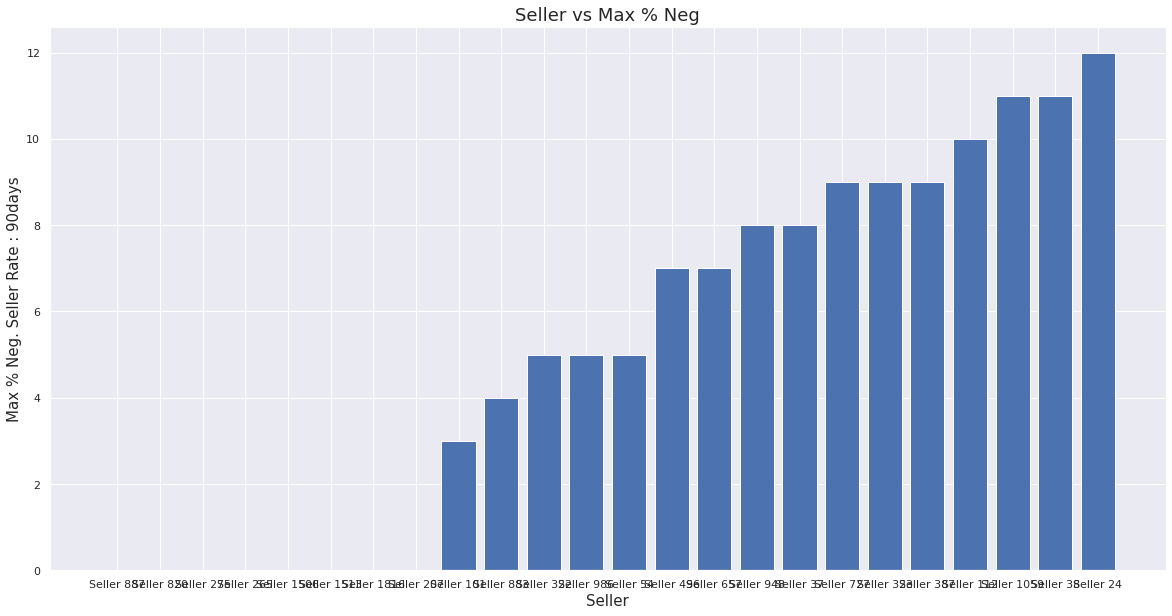

In [26]:
plt.figure(figsize=(20,10))
# make bar plot with matplotlib
n_ecom.sort_values('MaxNegsellerRate90_%',inplace = True)
plt.bar('sellerlink', 'MaxNegsellerRate90_%',data=n_ecom)
plt.xlabel("Seller", size=15)
plt.ylabel("Max % Neg. Seller Rate : 90days", size=15)
plt.title("Seller vs Max % Neg", size=18)

Text(0.5, 1.0, 'Seller vs Max % Neg')

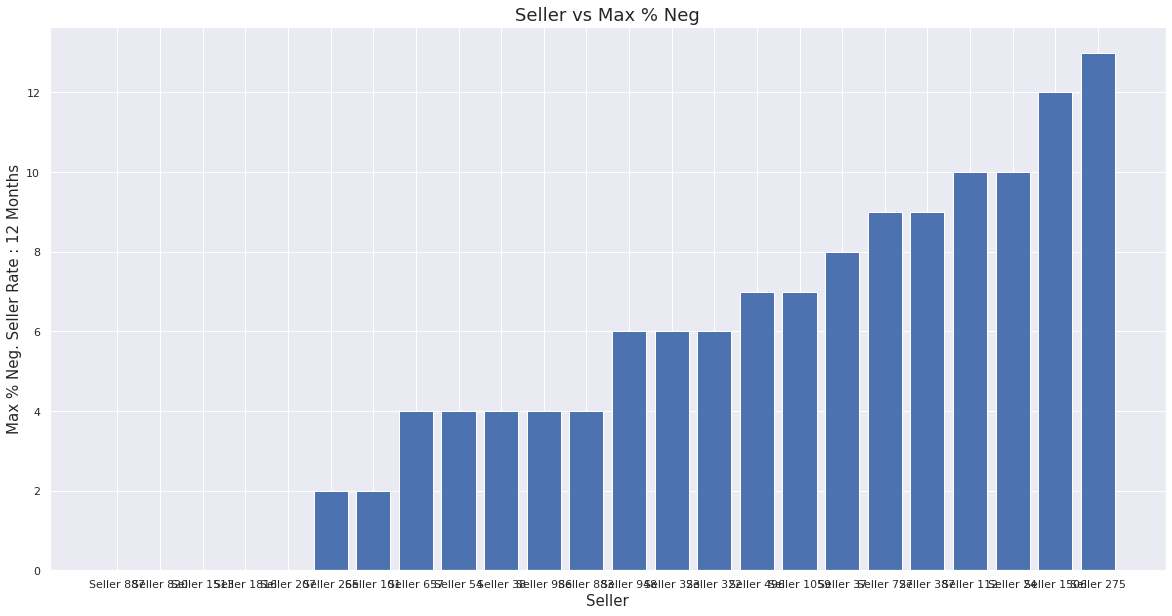

In [27]:
plt.figure(figsize=(20,10))
# make bar plot with matplotlib
n_ecom.sort_values('MaxNegsellerRate12mnth_%',inplace = True)
plt.bar('sellerlink', 'MaxNegsellerRate12mnth_%',data=n_ecom)
plt.xlabel("Seller", size=15)
plt.ylabel("Max % Neg. Seller Rate : 12 Months", size=15)
plt.title("Seller vs Max % Neg", size=18)

Text(0.5, 1.0, 'Seller vs Pos %')

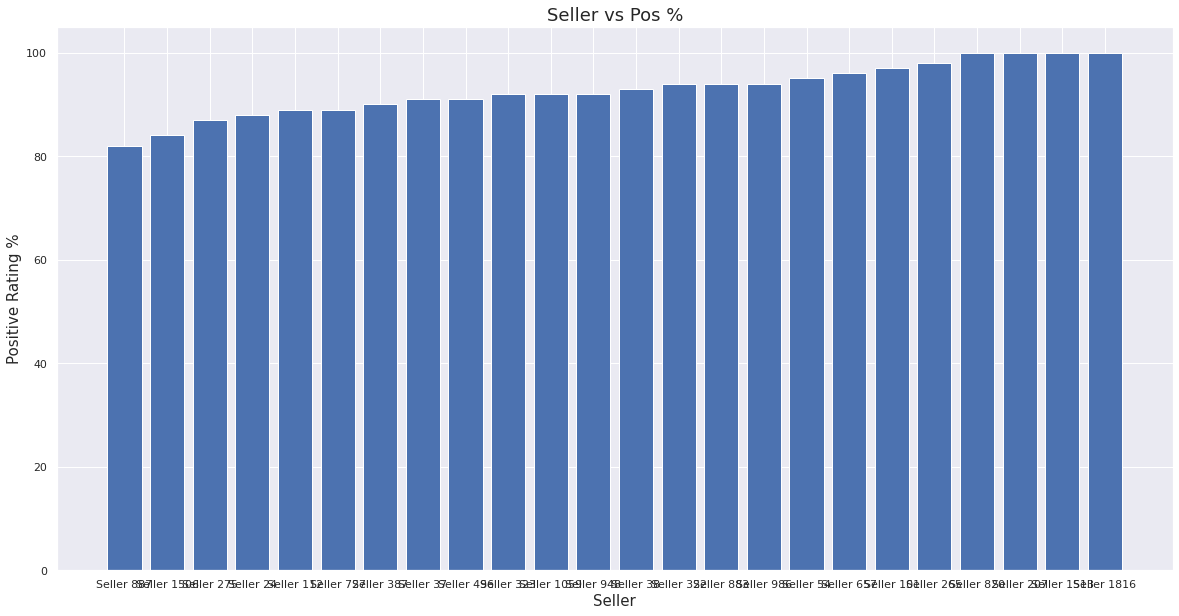

In [28]:
plt.figure(figsize=(20,10))
# make bar plot with matplotlib
n_ecom.sort_values('Pos_%',inplace = True)
plt.bar('sellerlink', 'Pos_%',data=n_ecom)
plt.xlabel("Seller", size=15)
plt.ylabel("Positive Rating %", size=15)
plt.title("Seller vs Pos %", size=18)

Text(0.5, 1.0, 'Country vs Brand Count')

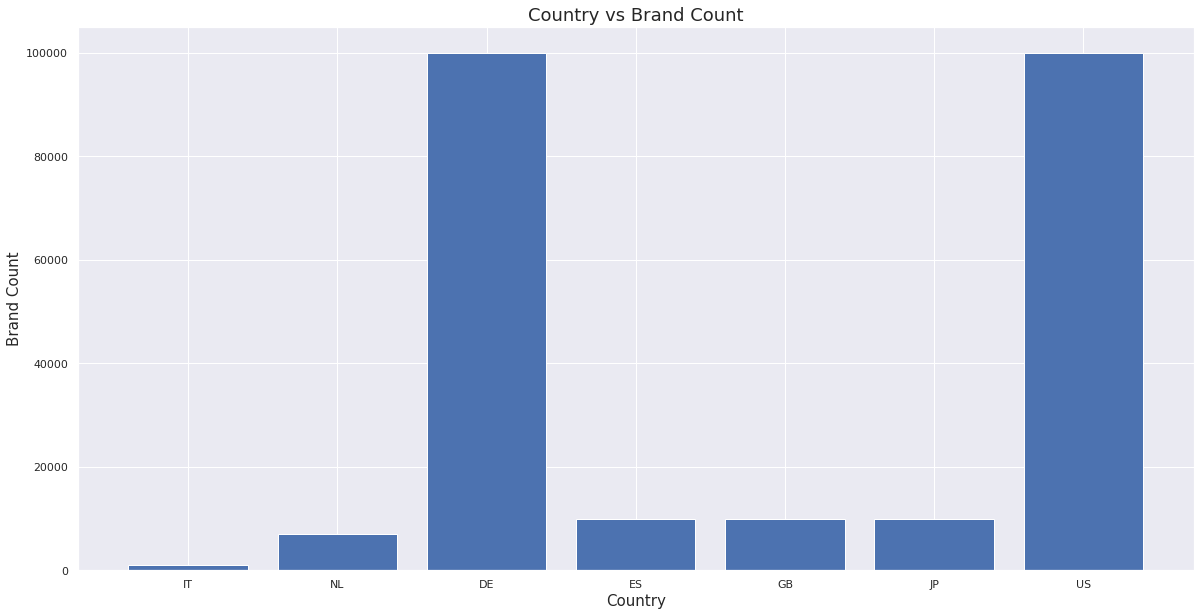

In [29]:
plt.figure(figsize=(20,10))
# make bar plot with matplotlib
n_ecom.sort_values('sellerproductcount',inplace = True)
plt.bar('Country', 'sellerproductcount',data=n_ecom)
plt.xlabel("Country", size=15)
plt.ylabel("Brand Count", size=15)
plt.title("Country vs Brand Count", size=18)

Geographical istribution is observed here. With Germany(DE) and US having the max brand count

In [30]:
print(ecommerce['sellerratings'])

0        118
14       116
22        10
23      3134
24       610
        ... 
1784    2630
1785       3
1808      16
1814    3075
1815       4
Name: sellerratings, Length: 432, dtype: int64


In [31]:
index_names7 = n_ecom[(n_ecom['sellerratings'] <= 200)].index
n_ecom.drop(index_names7, inplace = True)

In [32]:
n_ecom.sort_values(by = 'Pos_%',ascending=False)

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,MaxNegsellerRate90_%,MaxNegsellerRate12mnth_%,HP1,HP2,Sample brand name,Sample Brand URL,Pos_%,Phone_seller,E-mail_seller,Country
100,2020-11-15,Garden,Seller 101,Seller 101-link,Seller 101-storefrontlink,7000,3416,Kessler electronic GmbH\n Dieselstrasse 4\n 50...,Business Name:Kessler electronic GmbH,Dieselstr.4Kerpen50170DE,...,3,2,47337,32420,Visit the Varta Store,https://www.amazon.de/-/en/stores/VARTA+/page/...,97,49 (0)2273,info@kessler-electronic.de,DE
53,2020-11-15,Garden,Seller 54,Seller 54-link,Seller 54-storefrontlink,8000,4189,Impressum der Kaleido.Shop GmbH\nKaleido.Shop ...,Business Name:Kaleido.Shop GmbH,Neubrückenstr.7cBürenNordrhein-Westfalen33142DE,...,5,4,40684,10339,Visit the TFA Dostmann Store,https://www.amazon.de/-/en/stores/TFA+Dostmann...,95,NaN,info@kaleidoshop.de,DE
882,2020-11-15,Garden,Seller 883,Seller 883-link,Seller 883-storefrontlink,4000,6086,Impressum\n \n Gesetzliche Anbieterkennung:\...,Business Name:Vitamed Matthias Quinger e.K.,Emil-Von-Behring Straße 2AltripRheinland Pfalz...,...,4,4,66776,32420,Visit the Varta Store,https://www.amazon.de/-/en/stores/VARTA+/page/...,94,+4962369329325,service@vitamed-quinger.com,DE
985,2020-11-15,Garden,Seller 986,Seller 986-link,Seller 986-storefrontlink,100000,363,"Schreibwaren Wegmann, Janos Metz e.K. Inhaber:...","Business Name:Schreibwaren Wegmann, Inh. Janos...",Schreibwaren WegmannStadtplatz 39ZwieselBayern...,...,5,4,40684,13311,Visit the TFA Dostmann Store,https://www.amazon.de/-/en/stores/TFA+Dostmann...,94,9922609490,info@schreibwaren-wegmann.de,DE
1058,2020-11-15,Garden,Seller 1059,Seller 1059-link,Seller 1059-storefrontlink,10000,578,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Business Name:SJ-Werbung,Handelsring3Südbrookmerland26624DE,...,11,7,47340,18561,Visit the Goobay Store,https://www.amazon.de/-/en/stores/Goobay/page/...,92,4942203673,amazon@wtnord.de,DE
322,2020-11-15,Garden,Seller 323,Seller 323-link,Seller 323-storefrontlink,30000,699,Milovan Stojkovic\n Mühlenstr. 16\n 48431 Rhei...,Business Name:Milovan Stojkovic,Brechtestr. 44Rheine48431DE,...,9,6,71673,58332,Visit the Swiffer Store,https://www.amazon.de/-/en/stores/P%26G+Swiffe...,92,8 00 38 03,info@limuno.com,DE
36,2020-11-15,Garden,Seller 37,Seller 37-link,Seller 37-storefrontlink,50000,5150,IMPRESSUM \n itenga GmbH\n Am Umspannwerk 2\n ...,Business Name:itenga GmbH,itenga GmbHAm Umspannwerk 2Illingen66557DE,...,8,8,40683,18910,Visit the Vileda Store,https://www.amazon.de/-/en/stores/Vileda+GmbH+...,91,NaN,info@itenga.de,DE
495,2020-11-15,Garden,Seller 496,Seller 496-link,Seller 496-storefrontlink,100000,288,SELECT ELITE is committed to providing each cu...,Business Name:C. Y. MARKETING INC.,1249 S DIAMOND BAR BOULLEVARD UNIT 61DIAMOND B...,...,7,7,77714,70732,Visit the Weber Store,https://www.amazon.de/-/en/stores/Weber/page/9...,91,NaN,NaN,US
386,2020-11-15,Garden,Seller 387,Seller 387-link,Seller 387-storefrontlink,10000,1410,Die Europäische Kommission bietet eine Onlinep...,Business Name:Johann Haslberger,Humboldtstrasse 25BautzenSachsen02625DE,...,9,9,19281,11904,Gebol,https://www.amazon.de/-/en/Gebol/b/ref=bl_dp_s...,90,NaN,NaN,DE
726,2020-11-15,Garden,Seller 727,Seller 727-link,Seller 727-storefrontlink,40000,7242,trendmile GmbH\n\nAmtsgericht Darmstadt HR B 8...,Business Name:trendmile GmbH,Bauhofstr.24Lampertheim68623DE,...,9,9,40681,13311,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,89,951326 - 0,support@trendmile.com,DE


Sorted df on the basis of pos% of rating, these are the top sellers

##### Clustering

In [33]:
ecom2 = ecommerce.copy()

Text(0, 0.5, 'WCSS')

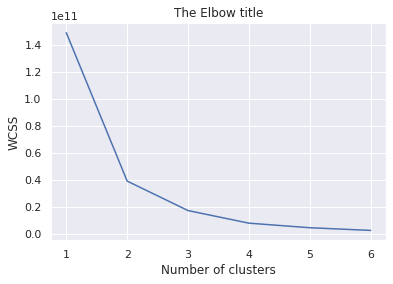

In [34]:
df1 = ecom2[['sellerproductcount','Country']]

df1["Country"] = df1["Country"].astype('category')
df1["Country_cat"] = df1["Country"].cat.codes
#df1

df1 = df1[['sellerproductcount','Country_cat']]

wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(df1)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

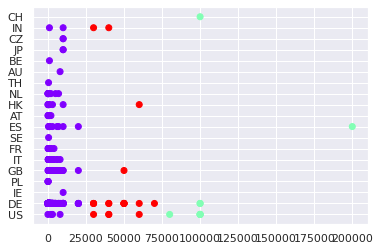

In [35]:
kmeans = KMeans(3)
kmeans.fit(df1)
identified_clusters = kmeans.fit_predict(df1)

data_with_clusters = ecom2.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['sellerproductcount'],data_with_clusters['Country'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [36]:
Hero_P1 = []
for row in ecom2['HP1']:
  if row > 60000 :
    Hero_P1.append('Top_rated')
  elif row > 40000:   
    Hero_P1.append('Medium_rated')
  elif row > 20000:  
    Hero_P1.append('Less_rated')
  else:
    Hero_P1.append('least_rated')

Hero_P2 = []
for row in ecom2['HP2']:
  if row > 60000 :
    Hero_P2.append('Top_rated')
  elif row > 40000:   
    Hero_P2.append('Medium_rated')
  elif row > 20000:  
    Hero_P2.append('Less_rated')
  else:
    Hero_P2.append('least_rated')

In [37]:
ecom2['Hero_P1']=Hero_P1
ecom2['Hero_P2']=Hero_P2

ecom2["Hero_P1"] = ecom2["Hero_P1"].astype('category')
ecom2["Hero_P1_cat"] = ecom2["Hero_P1"].cat.codes

ecom2["Hero_P2"] = ecom2["Hero_P2"].astype('category')
ecom2["Hero_P2_cat"] = ecom2["Hero_P2"].cat.codes

Text(0, 0.5, 'WCSS')

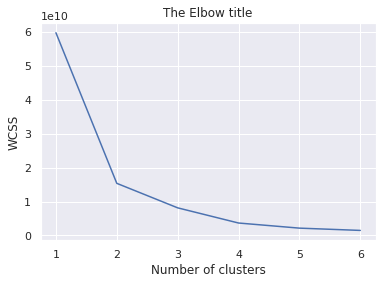

In [38]:
df1 = ecom2[['HP1','Hero_P1_cat']]

wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(df1)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

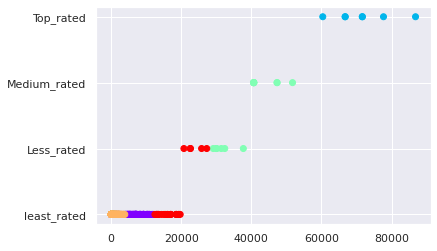

In [39]:
kmeans = KMeans(5)
kmeans.fit(df1)
identified_clusters = kmeans.fit_predict(df1)
data_with_clusters = ecom2.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['HP1'],data_with_clusters['Hero_P1'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

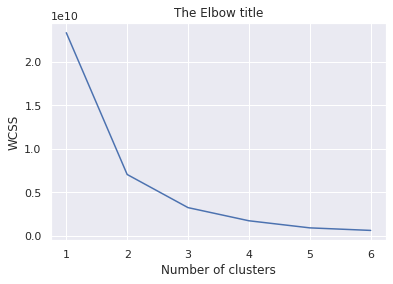

In [40]:
df1 = ecom2[['HP2','Hero_P2_cat']]

wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(df1)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

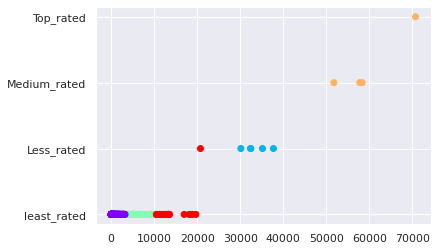

In [41]:
kmeans = KMeans(5)
kmeans.fit(df1)
identified_clusters = kmeans.fit_predict(df1)
data_with_clusters = ecom2.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['HP2'],data_with_clusters['Hero_P2'],c=data_with_clusters['Clusters'],cmap='rainbow')